# Section 1: Data Loading and Data Understanding

## 1.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

# for Visualization

import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Load the Dataset

In [2]:
df = pd.read_csv("Thyroid_Recurrence_Dataset.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,17,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
1,27,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Multi-Focal,Intermediate,T2,N0,M0,I,Excellent,No
2,44,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
3,63,F,No,No,No,Euthyroid,Normal,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
4,57,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes


## 1.3 Dataset Shape (Rows & Columns)

In [3]:
df.shape

(1557, 17)

## 1.4 Column Information & Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1557 non-null   int64 
 1   Gender                1557 non-null   object
 2   Smoking               1557 non-null   object
 3   Hx Smoking            1557 non-null   object
 4   Hx Radiothreapy       1557 non-null   object
 5   Thyroid Function      1557 non-null   object
 6   Physical Examination  1557 non-null   object
 7   Adenopathy            1557 non-null   object
 8   Pathology             1557 non-null   object
 9   Focality              1557 non-null   object
 10  Risk                  1557 non-null   object
 11  T                     1557 non-null   object
 12  N                     1557 non-null   object
 13  M                     1557 non-null   object
 14  Stage                 1557 non-null   object
 15  Response              1557 non-null   

## 1.5 Summary Statistics (Numerical Features)

In [5]:
df.describe()

,Age
count,1557.000000
mean,42.126525
std,19.947522
min,15.000000
25%,25.000000
50%,39.000000
75%,56.000000
max,82.000000


## 1.6 Target Variable Distribution (Recurred)

In [6]:
df['Recurred'].value_counts()

Recurred
Yes    800
No     757
Name: count, dtype: int64

In [7]:
df['Recurred'].value_counts(normalize=True) * 100

Recurred
Yes    51.380861
No     48.619139
Name: proportion, dtype: float64

## 1.7 Check Missing Values

In [8]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

# Data preprocessing

## 1.8 Checking Duplicates

In [9]:
# Checking for duplicate rows

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


## 1.9 Column-wise Inconsistency Check 

In [10]:
# Checking unique values in each column to identify inconsistencies

for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: Age
[17 27 44 63 57 47 19 53 22 76 23 35 56 24 69 37 81 48 42 33 77 72 36 66
 82 18 49 68 20 26 70 67 55 31 46 74 54 38 28 61 58 21 50 60 45 52 51 43
 75 59 34 41 29 78 32 40 80 71 25 39 65 30 62 64 79 73 15]

Column: Gender
['M' 'F']

Column: Smoking
['No' 'Yes']

Column: Hx Smoking
['No' 'Yes']

Column: Hx Radiothreapy
['No' 'Yes']

Column: Thyroid Function
['Euthyroid' 'Subclinical Hypothyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Clinical Hyperthyroidism']

Column: Physical Examination
['Single nodular goiter-right' 'Multinodular goiter' 'Normal'
 'Single nodular goiter-left' 'Diffuse goiter']

Column: Adenopathy
['No' 'Bilateral' 'Right' 'Left' 'Extensive' 'Posterior']

Column: Pathology
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Column: Focality
['Uni-Focal' 'Multi-Focal']

Column: Risk
['Low' 'Intermediate' 'High']

Column: T
['T2' 'T4a' 'T4b' 'T3a' 'T1a' 'T1b' 'T3b']

Column: N
['N0' 'N1b' 'N1a']

Column: M
['M0' 'M1']

Column: 

## 1.10 Outlier Detection 

In [11]:
# Outlier detection using IQR for numeric columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} potential outliers")


Age: 0 potential outliers


## 1.11 Basic Visualization of Target Variable

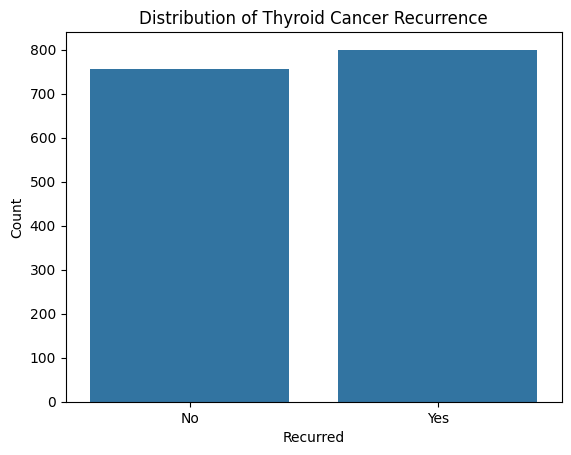

In [12]:
plt.figure()
sns.countplot(x='Recurred', data=df)
plt.title("Distribution of Thyroid Cancer Recurrence")
plt.xlabel("Recurred")
plt.ylabel("Count")
plt.show()

# Section 2: Exploratory Data Analysis (EDA)

## 2.1 Distribution of Age

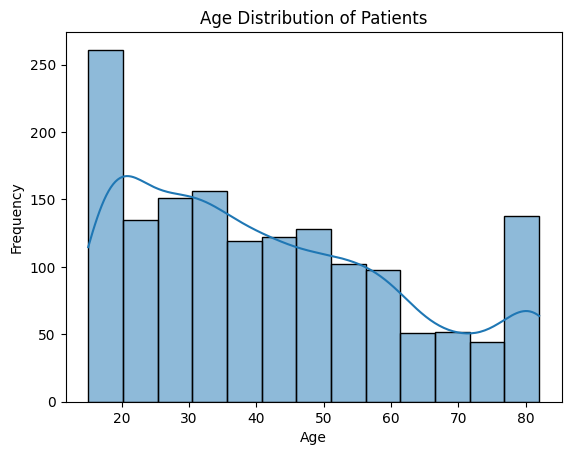

In [13]:
plt.figure()
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

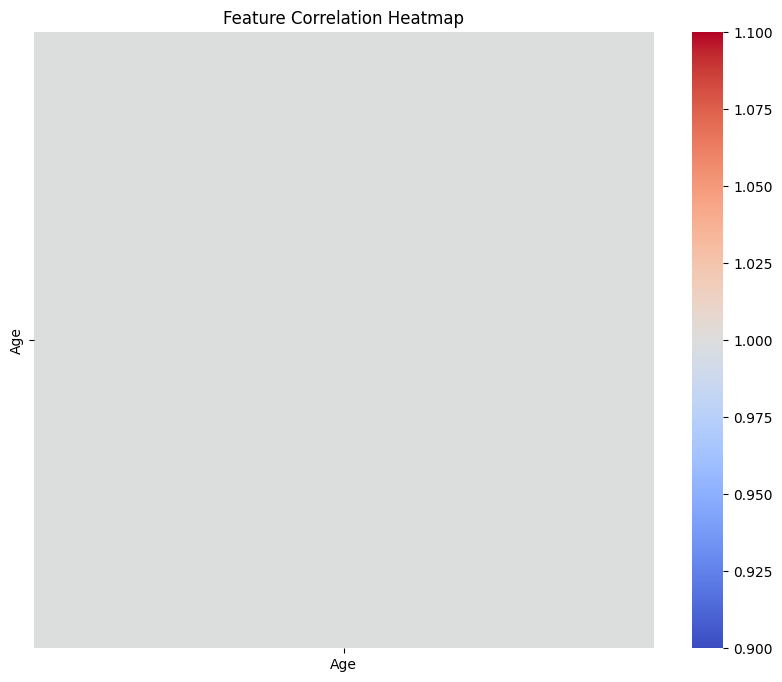

In [14]:
# Selecting only numeric columns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## 2.2 Gender Distribution

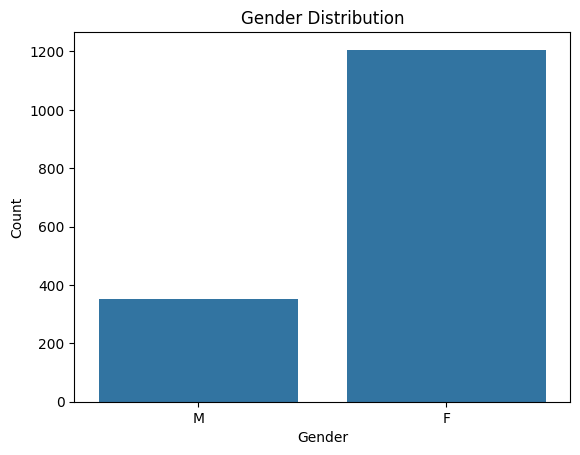

In [15]:
plt.figure()
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## 2.3 Gender Vs Recurrence

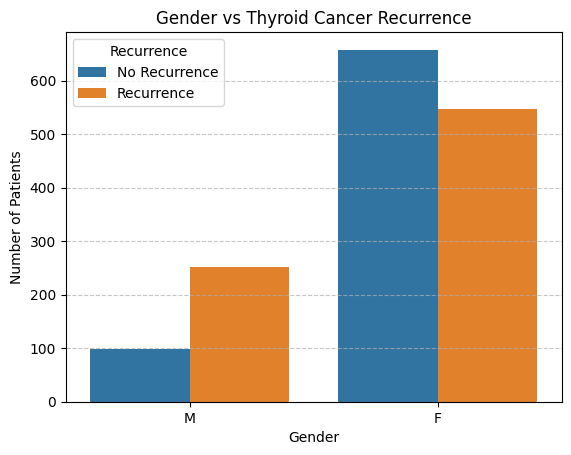

In [16]:

plt.figure()
sns.countplot(x='Gender', hue='Recurred', data=df)
plt.title("Gender vs Thyroid Cancer Recurrence")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.legend(title="Recurrence", labels=["No Recurrence", "Recurrence"])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 2.3 Smoking vs Recurrence

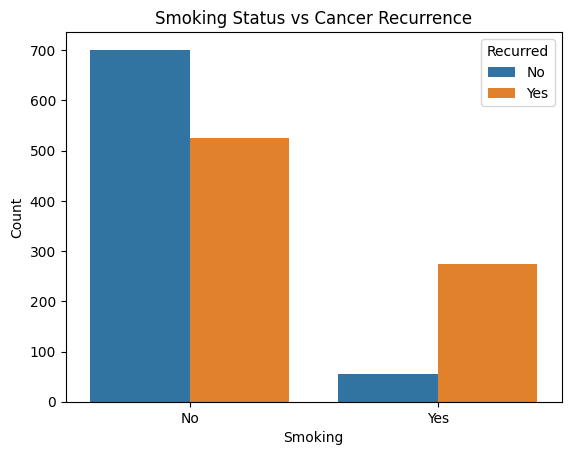

In [17]:
plt.figure()
sns.countplot(x='Smoking', hue='Recurred', data=df)
plt.title("Smoking Status vs Cancer Recurrence")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Recurred")
plt.show()

## 2.4 Pathology Type Distribution

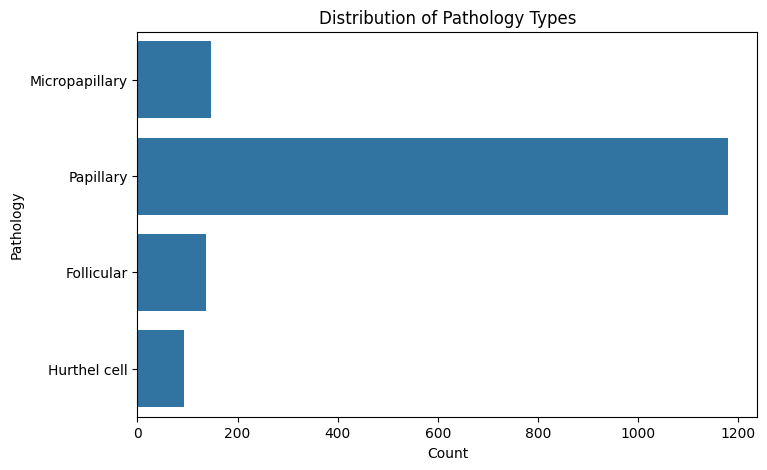

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(y='Pathology', data=df)
plt.title("Distribution of Pathology Types")
plt.xlabel("Count")
plt.ylabel("Pathology")
plt.show()

## 2.5 Risk Level vs Recurrence

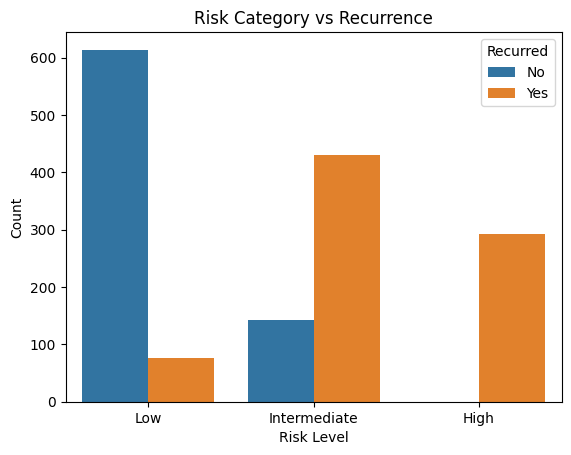

In [19]:
plt.figure()
sns.countplot(x='Risk', hue='Recurred', data=df)
plt.title("Risk Category vs Recurrence")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

## 2.6 Tumor Stage (T) vs Recurrence

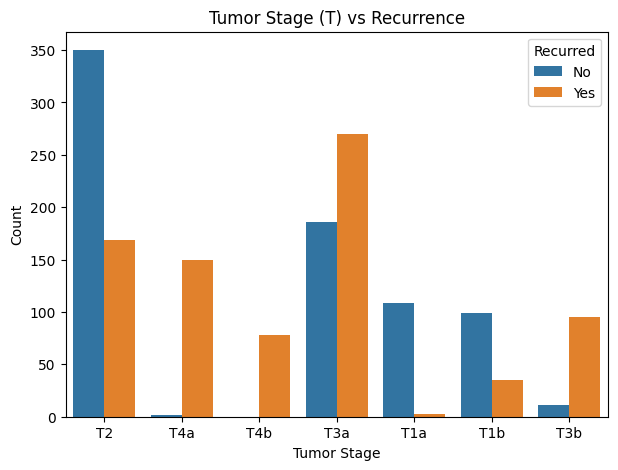

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='T', hue='Recurred', data=df)
plt.title("Tumor Stage (T) vs Recurrence")
plt.xlabel("Tumor Stage")
plt.ylabel("Count")
plt.show()

## 2.7 Lymph Node Involvement (N) vs Recurrence

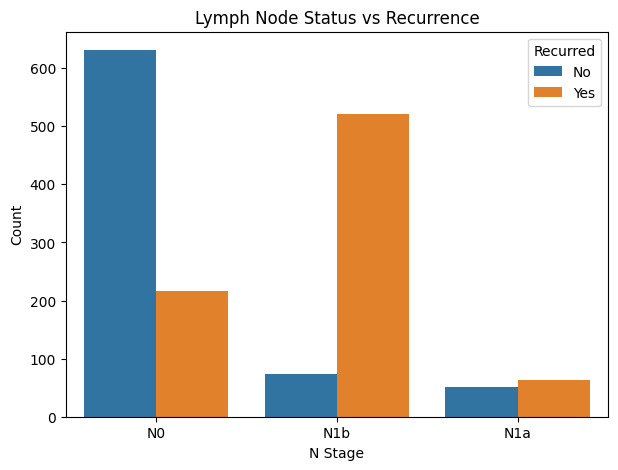

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x='N', hue='Recurred', data=df)
plt.title("Lymph Node Status vs Recurrence")
plt.xlabel("N Stage")
plt.ylabel("Count")
plt.show()

## 2.8 Response to Treatment vs Recurrence

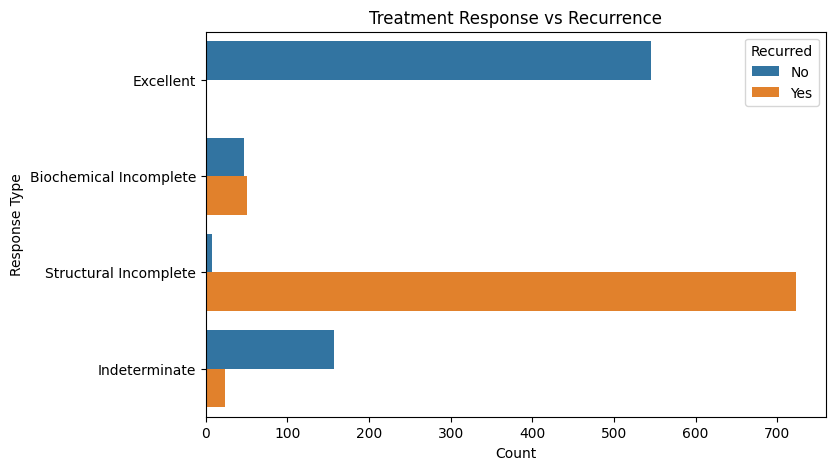

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(y='Response', hue='Recurred', data=df)
plt.title("Treatment Response vs Recurrence")
plt.xlabel("Count")
plt.ylabel("Response Type")
plt.show()

# Section 3: Feature Scaling, Data Splitting & Model Training

## 3.1 Separate Features and Target Variable

In [23]:
# Target variable
y = df['Recurred']

# Feature variables
X = df.drop('Recurred', axis=1)

## 3.2 Encode Target Variable

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check mapping

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'No': np.int64(0), 'Yes': np.int64(1)}

## 3.3 Encode Categorical Features

In [25]:
X_encoded = pd.get_dummies(X, drop_first=True)

## 3.4 Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## 3.5 Train–Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

## 3.6 Model Training

### 3.6.1 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 3.6.2 KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Creating KNN model with k=5  

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 3.6.3 Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Section 4: Model Evaluation (Base Models)

## 4.1 Import Evaluation Libraries

In [31]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    classification_report
)

## 4.2 Generate Predictions

In [32]:
# Predictions

y_pred_lr = log_reg.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Probabilities for ROC

y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

## 4.3 Confusion Matrices

### Logistic Regression

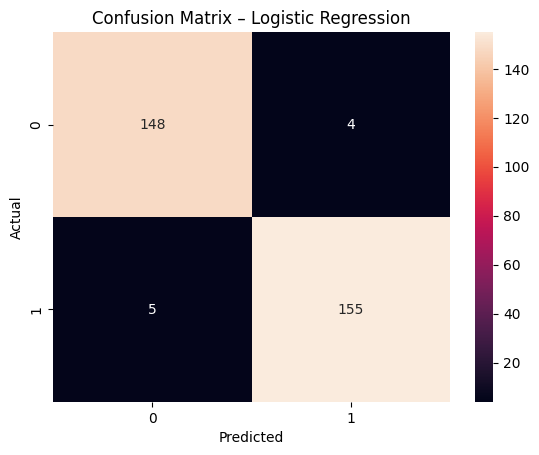

In [33]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

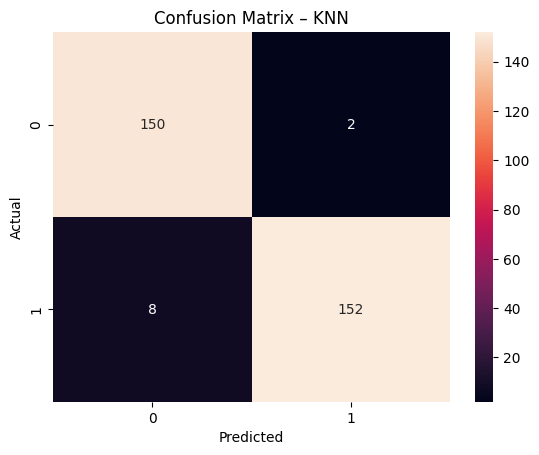

In [34]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

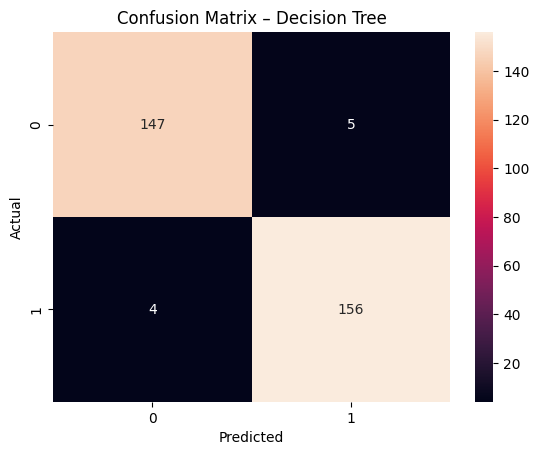

In [35]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.4 Performance Metrics Table

In [36]:
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_dt)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt)
    ]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.971154,0.974843,0.96875,0.971787
1,KNN,0.967949,0.987013,0.95000,0.968153
2,Decision Tree,0.971154,0.968944,0.97500,0.971963


## 4.5 Comparative Visualization – Metric Bar Chart

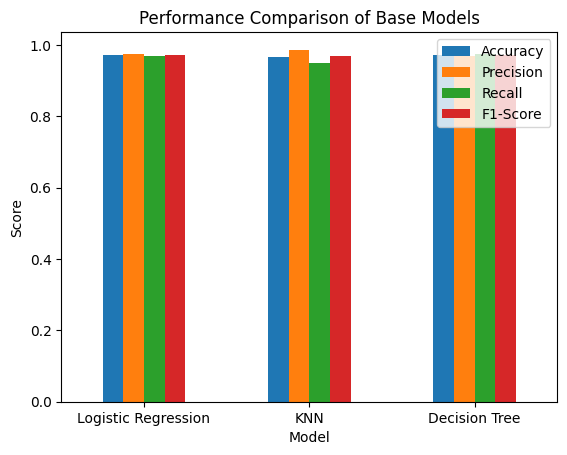

In [37]:
metrics_df.set_index('Model').plot(kind='bar')
plt.title("Performance Comparison of Base Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

## 4.6 ROC Curve & AUC Comparison

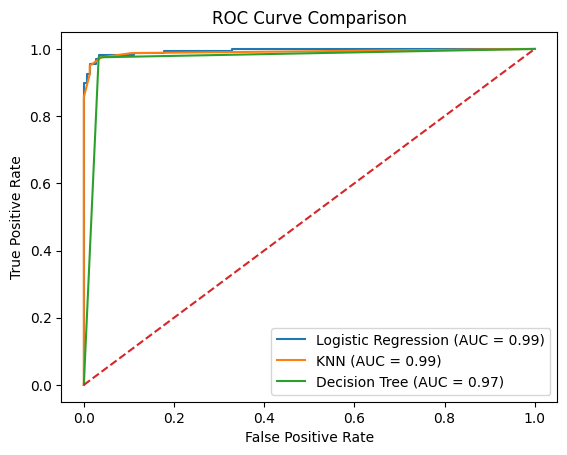

In [38]:
# ROC curves

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## 4.7 AUC Score Comparison (Bar Chart)

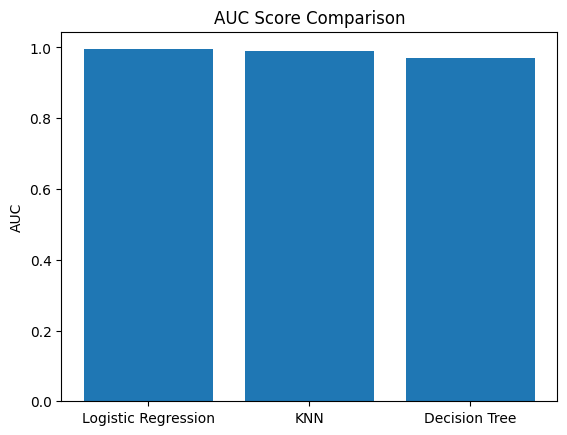

In [39]:
plt.figure()
plt.bar(['Logistic Regression', 'KNN', 'Decision Tree'],
        [auc_lr, auc_knn, auc_dt])
plt.title("AUC Score Comparison")
plt.ylabel("AUC")
plt.show()

## 4.8 Classification Reports

In [40]:
print("Logistic Regression Report\n", classification_report(y_test, y_pred_lr))
print("KNN Report\n", classification_report(y_test, y_pred_knn))
print("Decision Tree Report\n", classification_report(y_test, y_pred_dt))

Logistic Regression Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       152
           1       0.97      0.97      0.97       160

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312

KNN Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       152
           1       0.99      0.95      0.97       160

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312

Decision Tree Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       152
           1       0.97      0.97      0.97       160

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg

# Section 5: Hyperparameter Tuning & Performance Comparison

## 5.1 Hyperparameter Tuning Using Grid Search

### 5.1.1 Logistic Regression Tuning (penalty, C)

In [41]:
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_param_grid,
    scoring='f1',
    cv=5
)

lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

### 5.1.2 KNN

In [42]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    scoring='f1',
    n_jobs=-1
)
knn_grid.fit(X_train, y_train)


best_knn = knn_grid.best_estimator_
knn_grid.best_params_

{'n_neighbors': 7}

### 5.1.3 Decision Tree Tuning (max_depth, min_samples_split)

In [43]:
dt_param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    scoring='f1',
    cv=5
)

dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
dt_grid.best_params_

{'max_depth': None, 'min_samples_split': 10}

## 5.2 Predictions of Tuned Models

In [44]:
# Predictions

y_pred_lr_tuned = best_lr.predict(X_test)
y_pred_knn_tuned = best_knn.predict(X_test)
y_pred_dt_tuned = best_dt.predict(X_test)

# Probabilities

y_prob_lr_tuned = best_lr.predict_proba(X_test)[:, 1]
y_prob_knn_tuned = best_knn.predict_proba(X_test)[:, 1]
y_prob_dt_tuned = best_dt.predict_proba(X_test)[:, 1]

## 5.3 Before vs After Metrics Comparison Table

In [45]:
comparison_df = pd.DataFrame({
    'Model': [
        'Logistic Regression (Base)', 'Logistic Regression (Tuned)',
        'KNN (Base)', 'KNN (Tuned)',
        'Decision Tree (Base)', 'Decision Tree (Tuned)'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_knn_tuned),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_dt_tuned)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn_tuned),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt_tuned)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_knn_tuned),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt_tuned)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_knn_tuned),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt_tuned)
    ]
})

comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Base),0.971154,0.974843,0.96875,0.971787
1,Logistic Regression (Tuned),0.977564,0.987261,0.96875,0.977918
2,KNN (Base),0.967949,0.987013,0.95000,0.968153
3,KNN (Tuned),0.961538,0.974359,0.95000,0.962025
4,Decision Tree (Base),0.971154,0.968944,0.97500,0.971963
5,Decision Tree (Tuned),0.971154,0.980892,0.96250,0.971609


## 5.4 Visualization 1: Before vs After (F1-Score Comparison)

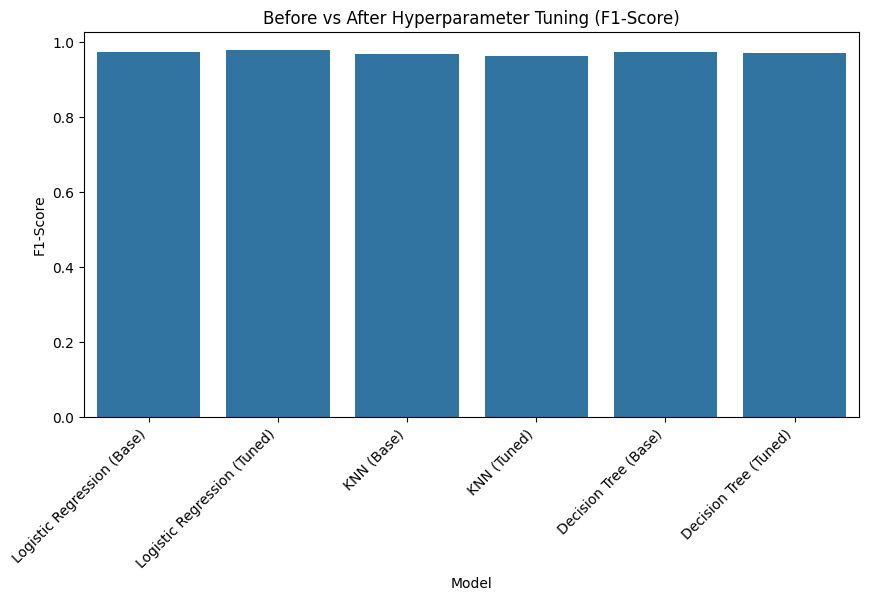

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='F1-Score', data=comparison_df)
plt.xticks(rotation=45, ha='right')
plt.title("Before vs After Hyperparameter Tuning (F1-Score)")
plt.show()

## 5.5 Visualization 2: Metric Improvement Heatmap

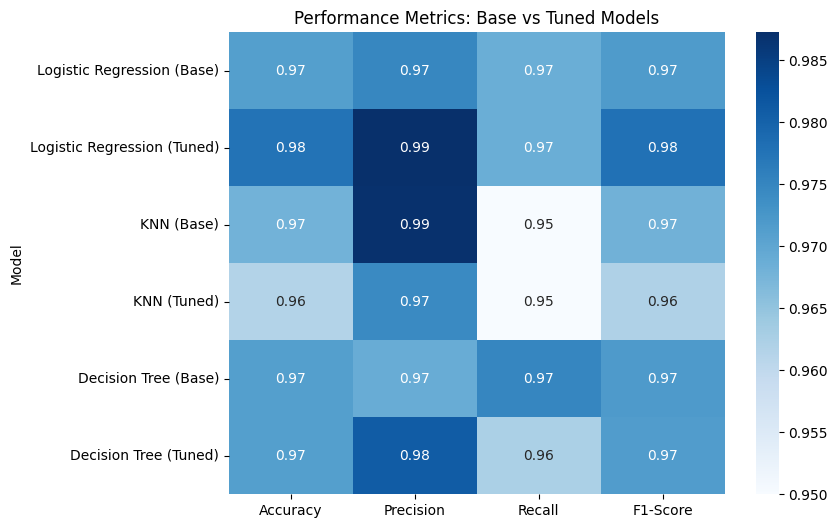

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(
    comparison_df.set_index('Model'),
    annot=True,
    cmap='Blues'
)
plt.title("Performance Metrics: Base vs Tuned Models")
plt.show()

## 5.6 Visualization 3: ROC Curve – Base vs Tuned

### Logistic Regression ROC Comparison

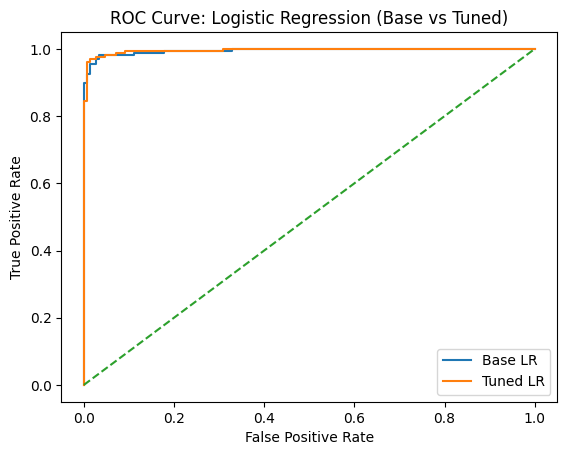

In [48]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_lr)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_lr_tuned)

plt.figure()
plt.plot(fpr_base, tpr_base, label='Base LR')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned LR')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression (Base vs Tuned)")
plt.legend()
plt.show()

### KNN ROC Comparison

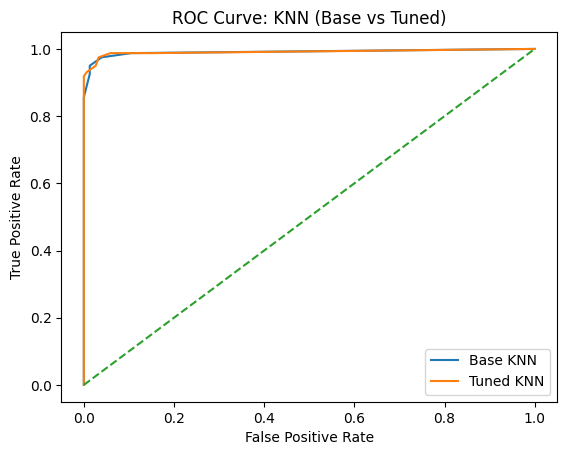

In [49]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_knn)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_knn_tuned)

plt.figure()
plt.plot(fpr_base, tpr_base, label='Base KNN')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned KNN')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: KNN (Base vs Tuned)")
plt.legend()
plt.show()

### Decision Tree ROC Comparison

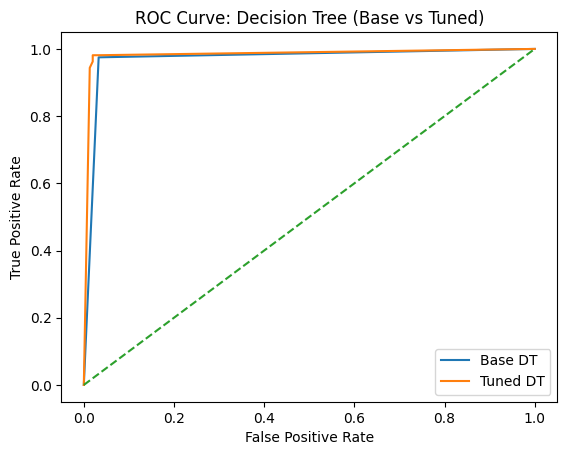

In [50]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_dt)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_dt_tuned)

plt.figure()
plt.plot(fpr_base, tpr_base, label='Base DT')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned DT')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Decision Tree (Base vs Tuned)")
plt.legend()
plt.show()

## 5.7 Visualization 4: AUC Improvement Bar Chart

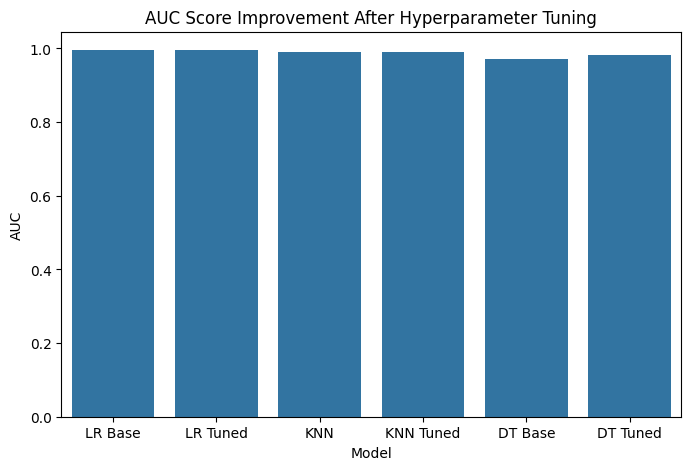

In [51]:
auc_comparison = pd.DataFrame({
    'Model': ['LR Base', 'LR Tuned', 'KNN', 'KNN Tuned', 'DT Base', 'DT Tuned'],
    'AUC': [
        auc(*roc_curve(y_test, y_prob_lr)[:2]),
        auc(*roc_curve(y_test, y_prob_lr_tuned)[:2]),
        auc(*roc_curve(y_test, y_prob_knn)[:2]),
        auc(*roc_curve(y_test, y_prob_knn_tuned)[:2]),
        auc(*roc_curve(y_test, y_prob_dt)[:2]),
        auc(*roc_curve(y_test, y_prob_dt_tuned)[:2])
    ]
})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='AUC', data=auc_comparison)
plt.title("AUC Score Improvement After Hyperparameter Tuning")
plt.show()

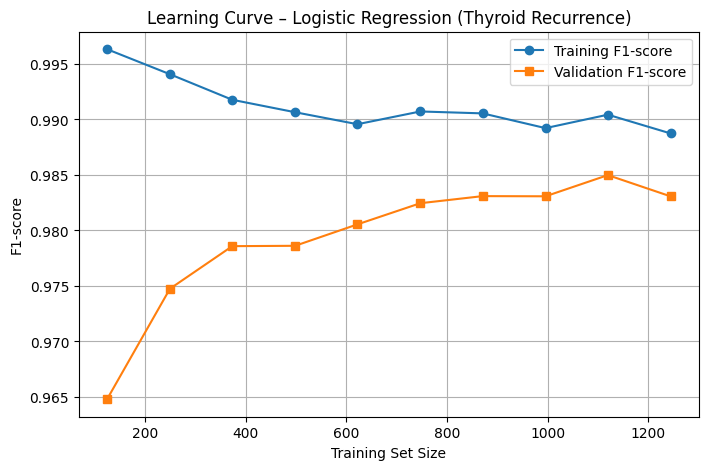

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression

# Identifying categorical/numerical columns from raw dataframe features 

cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(exclude=["object", "category"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

scorer = make_scorer(f1_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    pipe,
    X, y,
    cv=cv,
    scoring=scorer,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), marker='o', label="Training F1-score")
plt.plot(train_sizes, val_scores.mean(axis=1), marker='s', label="Validation F1-score")
plt.title("Learning Curve – Logistic Regression (Thyroid Recurrence)")
plt.xlabel("Training Set Size")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.show()


# Sample Prediction Using Tuned Logistic Regression Model 

In [53]:
import numpy as np
from sklearn.linear_model import LogisticRegression

def show_sample_predictions_lr(model, X_data, y_true, n=5, random_state=42):
    """
    Showing sample predictions for tuned Logistic Regression
    for Thyroid Cancer Recurrence prediction.

    """
    np.random.seed(random_state)
    indices = np.random.choice(len(X_data), size=n, replace=False)

    # Handling X_data (DataFrame or NumPy array)
    if hasattr(X_data, "iloc"):
        X_sample = X_data.iloc[indices].values
    else:
        X_sample = X_data[indices]

    # Handling y_true (Series or NumPy array)
    if hasattr(y_true, "iloc"):
        y_sample_true = y_true.iloc[indices].values
    else:
        y_sample_true = y_true[indices]

    y_pred = model.predict(X_sample)
    y_prob = model.predict_proba(X_sample)[:, 1]

    print("Sample Predictions using Tuned Logistic Regression (Thyroid Recurrence)")
    print("-" * 80)

    for i in range(n):
        true_label = y_sample_true[i]
        pred_label = y_pred[i]

        true_text = "Recurrence" if true_label == 1 else "No Recurrence"
        pred_text = "Recurrence" if pred_label == 1 else "No Recurrence"

        print(f"Sample {i+1}")
        print(f"True Label      : {true_label} ({true_text})")
        print(f"Predicted Label : {pred_label} ({pred_text})")
        print(f"Predicted Probability of Recurrence: {y_prob[i]:.3f}")
        print("-" * 80)



# Auto-detect tuned Logistic Regression model

model_to_use = None

if "best_lr" in globals():
    model_to_use = best_lr

if model_to_use is None:
    for obj in globals().values():
        if hasattr(obj, "best_estimator_"):
            be = obj.best_estimator_
            if isinstance(be, LogisticRegression):
                model_to_use = be
                break

if model_to_use is None:
    raise NameError(
        "Tuned Logistic Regression model not found. "
        "Run the Logistic Regression GridSearchCV cell first."
    )

# Run sample predictions (5 examples)
show_sample_predictions_lr(model_to_use, X_test, y_test, n=5)


Sample Predictions using Tuned Logistic Regression (Thyroid Recurrence)
--------------------------------------------------------------------------------
Sample 1
True Label      : 1 (Recurrence)
Predicted Label : 1 (Recurrence)
Predicted Probability of Recurrence: 0.999
--------------------------------------------------------------------------------
Sample 2
True Label      : 0 (No Recurrence)
Predicted Label : 0 (No Recurrence)
Predicted Probability of Recurrence: 0.009
--------------------------------------------------------------------------------
Sample 3
True Label      : 1 (Recurrence)
Predicted Label : 1 (Recurrence)
Predicted Probability of Recurrence: 0.933
--------------------------------------------------------------------------------
Sample 4
True Label      : 0 (No Recurrence)
Predicted Label : 0 (No Recurrence)
Predicted Probability of Recurrence: 0.011
--------------------------------------------------------------------------------
Sample 5
True Label      : 1 (Recurrenc

# P-R Curve

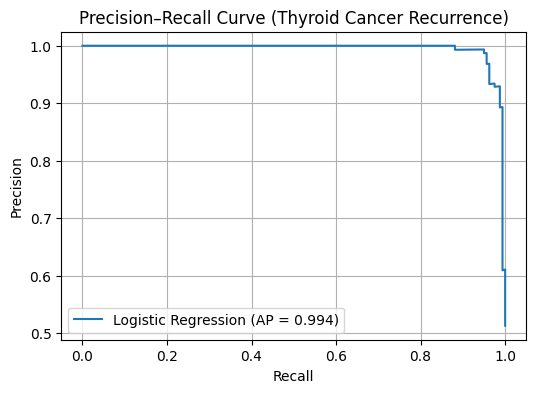

In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import warnings

# Silencing the feature-name warning 
warnings.filterwarnings(
    "ignore",
    message="X does not have valid feature names"
)

# Tuned Logistic Regression 

model = best_lr

# X_test is already numeric → just scaling it

X_test_scaled = scaler.transform(X_test)

# Probabilities for positive class (Recurrence = 1)

y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Precision–Recall values

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

# Plotting Precision–Recall Curve

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"Logistic Regression (AP = {ap_score:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Thyroid Cancer Recurrence)")
plt.legend()
plt.grid(True)
plt.show()
